# Predicting Depression in at-risk Individuals

### Problem statement formation: 
How can the NIMH decrease the median time delay for mental health treatment through the development of an app that screens individuals for mental illnesses?

Context:  According to the NIMH, one in five Americans live with a mental illness. This can include both mental, behavioral, or emotional disorders. In addition, according to the NIMH data from 2017, among the 46.6 million adults with any mental illness, 19.8 million (42.6%) received mental health services in the past year. Furthermore, in 2017, the NIMH identified that 4.5% of all U.S. adults experienced a serious mental illness (SMI), meaning that the SMI substantially interfered with or limited one or more major life activities (Substance Abuse and Mental Health Services Administration, 2018). As the effects of mental illness can be severe, it is prudent to diagnose and treat individuals with mental illness in a timely manner. There are significant delays in diagnosing and treating a mental illness after initial onset (McLaughline, 2004). 

Criteria for Success: The creation of an app that will screen individuals for depressive disorders and refer them to a psychiatrist immediately. Success will be measured by assessing the delay in treatment in upcoming years. It is expected that the median delay time will decrease from 11 years until the first contact with a psychiatrist, to less than one year.

Scope of solution space: This app will be used for adults (age 18 and up) in the United States who believe that they are struggling with their mental health. In the future, this can expand to other countries when data is collected from the WHO.

Constraints: There is a lot of missing data in the BRFSS. Potentially, this could be because people refused to answer due to sensitivity to the topic. Because of this, there could be a confounding variable and missing data will have to be dealt with carefully. In addition, the budget needs to be kept in mind because funding will be allocated from the NIMH for this project according to the likelihood of success.

Stakeholders: Those invested in this project will be the NIMH, the SAMHSA, psychiatric treatment providers and insurance companies.

Data Sources: Data is acquired from the 2001-2010 BRFSS, which includes over 200 items and over 200,000 responses. However, after reviewing the data included related to depression items, the sample size decreases to about 80,000.

Method: I will solve this problem by developing a classification model to predict the presence of a mental illness in individuals using the app. The app will narrow the predictors down to <=10 questions for ease of use.

Deliverables: The deliverables include an app that functions appropriately for adults in the United States, as well as a slide deck that explains how the app was developed and verified. In addition, all the code will be available in a GitHub repo for each step of the project.



In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,9)

In [2]:

import pandas as pd
#import BRFSS 2010 data and select columns of interest
df2=pd.read_csv('10.csv')
df2.shape
df2=df2[['EMTSUPRT', 'LSATISFY','ADPLEASR','ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK','ADMOVE','ADANXEV', 'ADDEPEV']]

In [3]:
#descriptive statistics
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
EMTSUPRT,436221.0,1.974605,1.444904,1.0,1.0,1.0,2.0,9.0
LSATISFY,435968.0,1.688021,0.973586,1.0,1.0,2.0,2.0,9.0
ADPLEASR,79466.0,61.909974,38.298421,1.0,10.0,88.0,88.0,99.0
ADDOWN,79420.0,65.177739,37.122756,1.0,14.0,88.0,88.0,99.0
ADSLEEP,79391.0,50.676638,40.693882,1.0,5.0,88.0,88.0,99.0
ADENERGY,79367.0,36.939232,39.828500,1.0,3.0,14.0,88.0,99.0
ADEAT1,79335.0,59.207676,39.124483,1.0,8.0,88.0,88.0,99.0
ADFAIL,79298.0,74.269868,30.735371,1.0,88.0,88.0,88.0,99.0
ADTHINK,79266.0,73.963553,30.872160,1.0,88.0,88.0,88.0,99.0
ADMOVE,79219.0,79.497684,24.815877,1.0,88.0,88.0,88.0,99.0


In [4]:
#shape of dataframe
df2.shape

(451075, 12)

In [5]:
#column names
df2.columns

Index(['EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY',
       'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [6]:
#get unique values for each variable

In [7]:

df2.EMTSUPRT.unique()

array([ 5., nan,  1.,  2.,  3.,  7.,  4.,  9.])

In [8]:
df2['LSATISFY'].unique()
       

array([ 1., nan,  2.,  3.,  4.,  7.,  9.])

In [9]:
df2['ADPLEASR'].unique()

array([nan, 88.,  1.,  8.,  2., 14.,  7., 77., 10.,  3.,  4.,  5., 99.,
       12.,  6.,  9., 11., 13.])

In [10]:
df2['ADDOWN'].unique()

array([nan, 88.,  1., 14.,  3.,  4.,  2., 10.,  5.,  8., 77.,  7.,  6.,
       99.,  9., 12., 13., 11.])

In [11]:
df2['ADSLEEP'].unique()

array([nan,  1., 88.,  4.,  2., 10.,  5.,  3.,  9., 14., 99.,  7., 77.,
        6., 12., 13.,  8., 11.])

In [12]:
df2['ADENERGY'].unique()

array([nan,  1.,  3., 88.,  6.,  2.,  5.,  7.,  4., 14.,  8., 13., 10.,
       77., 99., 12.,  9., 11.])

In [13]:
df2['ADEAT1'].unique()

array([nan,  2., 88.,  3.,  1.,  7., 10.,  4., 14.,  5.,  8.,  6., 99.,
       77., 12.,  9., 11., 13.])

In [14]:
df2['ADFAIL'].unique()

array([nan, 88.,  7.,  3.,  1., 14.,  2., 10.,  9.,  8., 12., 77.,  5.,
        4., 99.,  6., 13., 11.])

In [15]:
df2['ADTHINK'].unique()

array([nan, 88.,  4., 10.,  2.,  1.,  6.,  3., 14.,  5., 12.,  7., 77.,
       99.,  8., 13., 11.,  9.])

In [16]:
df2['ADMOVE'].unique()

array([nan, 88., 10., 14.,  2.,  1., 77.,  7.,  4.,  5.,  6., 99.,  3.,
        8., 12.,  9., 11., 13.])

In [17]:
df2['ADANXEV'].unique()

array([nan,  2.,  1.,  9.,  7.])

In [18]:
df2['ADDEPEV'].unique()

array([nan,  2.,  1.,  9.,  7.])

In [19]:
#create a separate df with mental health related variables
mental_health=df2[['EMTSUPRT', 'LSATISFY' , 'ADPLEASR','ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK','ADMOVE', 'ADANXEV', 'ADDEPEV']]
mental_health.describe()


,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,ADANXEV,ADDEPEV
count,436221.000000,435968.000000,79466.000000,79420.000000,79391.000000,79367.000000,79335.000000,79298.000000,79266.000000,79219.000000,79160.000000,79104.000000
mean,1.974605,1.688021,61.909974,65.177739,50.676638,36.939232,59.207676,74.269868,73.963553,79.497684,1.892724,1.843459
std,1.444904,0.973586,38.298421,37.122756,40.693882,39.828500,39.124483,30.735371,30.872160,24.815877,0.513281,0.528095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,10.000000,14.000000,5.000000,3.000000,8.000000,88.000000,88.000000,88.000000,2.000000,2.000000
50%,1.000000,2.000000,88.000000,88.000000,88.000000,14.000000,88.000000,88.000000,88.000000,88.000000,2.000000,2.000000
75%,2.000000,2.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,2.000000,2.000000
max,9.000000,9.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.000000,9.000000


In [20]:
#88 represents 'None', so replace with 0 for all applicable columns
import numpy as np
mental_health.describe()
mental_health.ADPLEASR.unique()
cols=list(mental_health.columns)
cols


mental_health.replace(88, 0, inplace=True)
mental_health.replace(77, np.nan, inplace=True)
mental_health.replace(99, np.nan, inplace=True)
mental_health['ADDEPEV'].replace(to_replace=7, value=np.nan, inplace=True)
mental_health['ADDEPEV'].replace(to_replace=9, value=np.nan, inplace=True)
mental_health['ADDEPEV'].replace(to_replace=2, value=0, inplace=True)

mental_health.EMTSUPRT.unique()
mental_health.LSATISFY.unique()
mental_health['ADDEPEV'].unique()



array([nan,  0.,  1.])

In [21]:
mental_health.columns


Index(['EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY',
       'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [22]:
#display number of missing values
nas=pd.DataFrame(mental_health.isnull().sum().sort_values(ascending=False),columns = ['Missing'])
pos = nas['Missing'] > 0
nas[pos]
mental_health.dropna(inplace=True)

In [23]:
nas=pd.DataFrame(mental_health.isnull().sum().sort_values(ascending=False),columns = ['Missing'])
pos = nas['Missing'] > 0
nas[pos]

,Missing


In [24]:

mental_health.describe()

,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,ADANXEV,ADDEPEV
count,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000
mean,1.869174,1.605244,1.656851,1.279172,2.902971,3.638516,2.092625,0.901770,1.004846,0.622184,1.880288,0.176745
std,1.263659,0.722140,3.488507,3.079750,4.559253,4.694482,3.981459,2.805918,2.962154,2.390097,0.414177,0.381455
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,1.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,9.000000,9.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,9.000000,1.000000


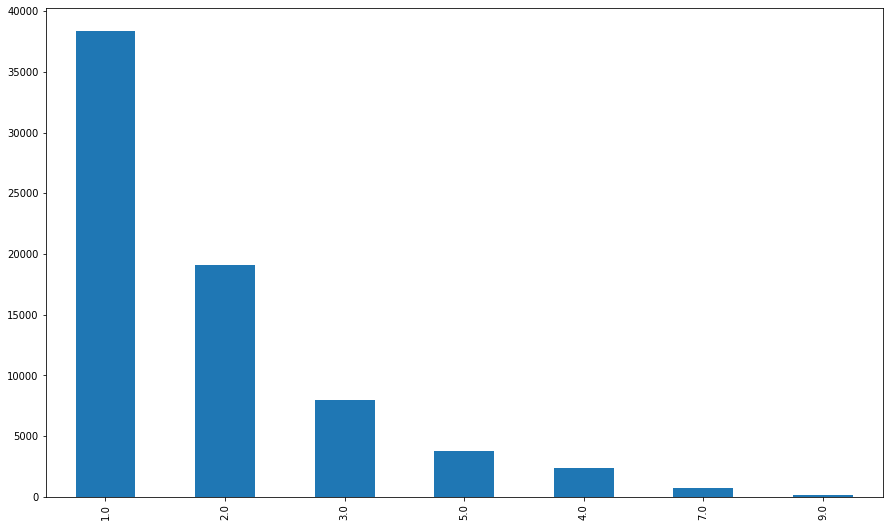

In [25]:
#work with categorical EDA Bar Charts
mental_health['EMTSUPRT'].value_counts().plot(kind='bar')


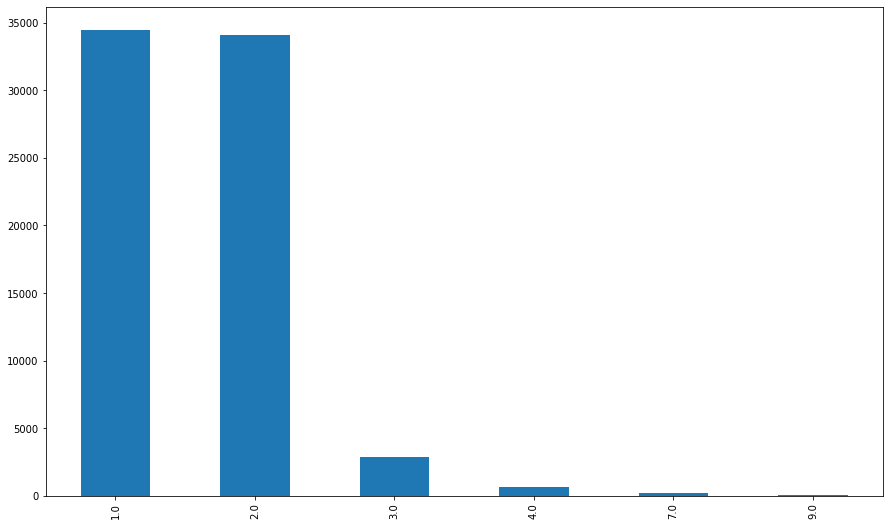

In [26]:
#work with df2 for categorical EDA
mental_health['LSATISFY'].value_counts().plot(kind='bar')

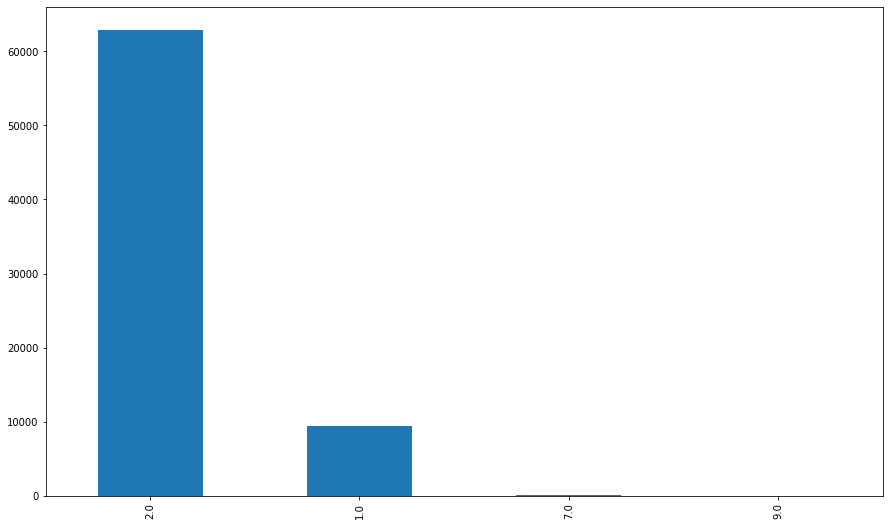

In [27]:
mental_health['ADANXEV'].value_counts().plot(kind='bar')

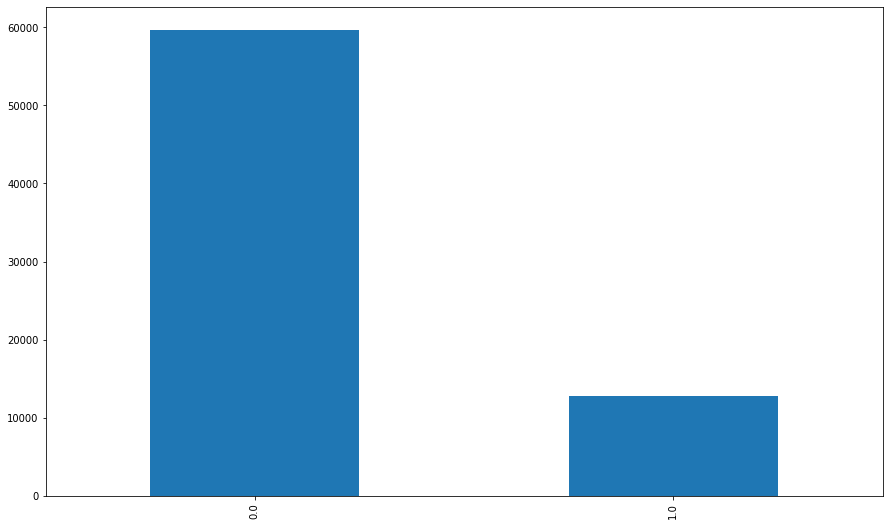

In [28]:
mental_health['ADDEPEV'].value_counts().plot(kind='bar')

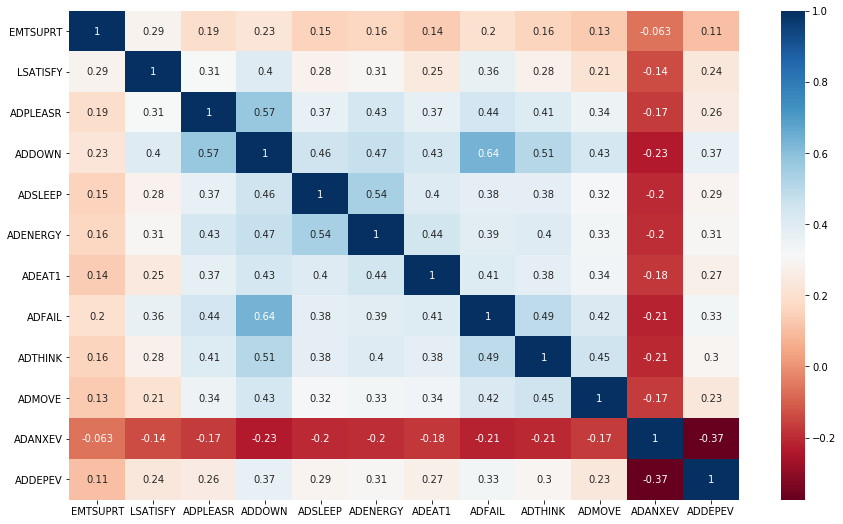

<Figure size 1440x1440 with 0 Axes>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

corrMatrix = mental_health.corr()
sns.heatmap(corrMatrix, annot=True, cmap='RdBu')
plt.figure(figsize=(20,20))
plt.show()
#focus on the AD items as predictors of ADDEPEV

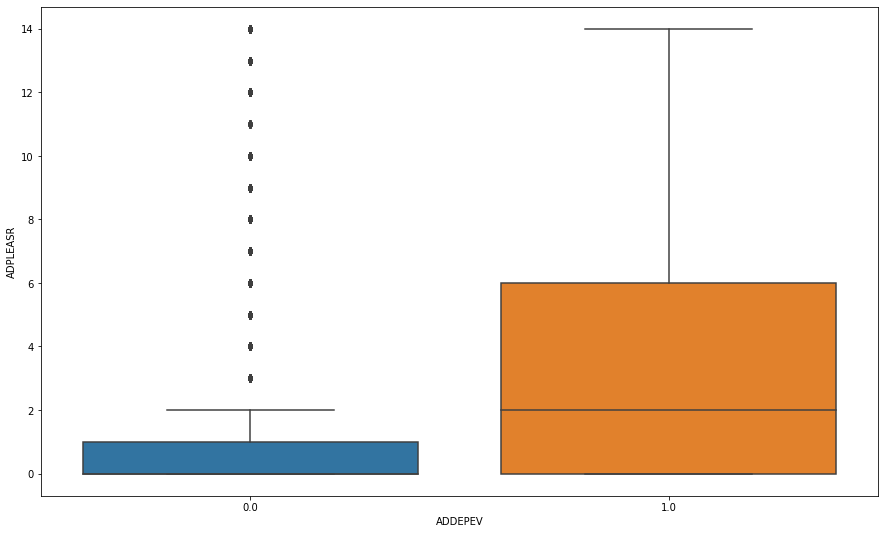

In [30]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADPLEASR')
#people who reported depression had more days with little pleasure


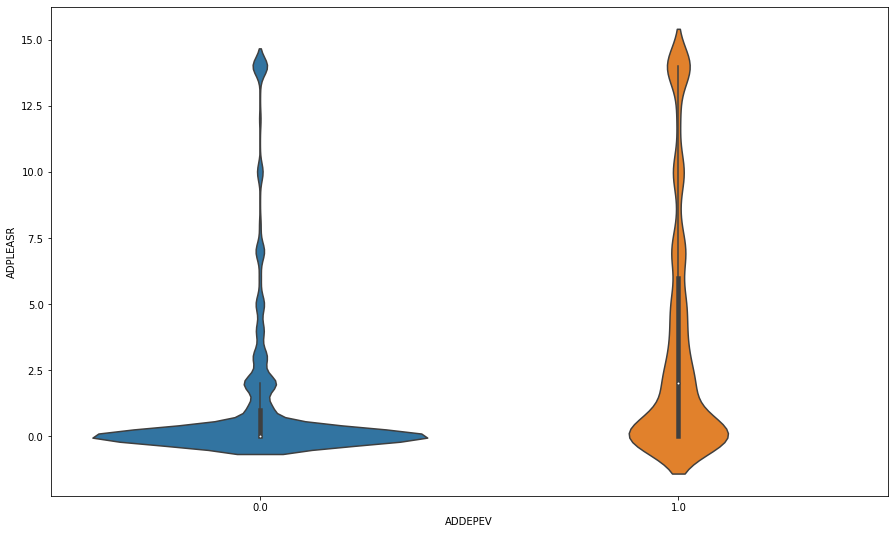

In [31]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADPLEASR')
#most of the people who didn't get diagnosed with depression reported 0 days of little pleasure

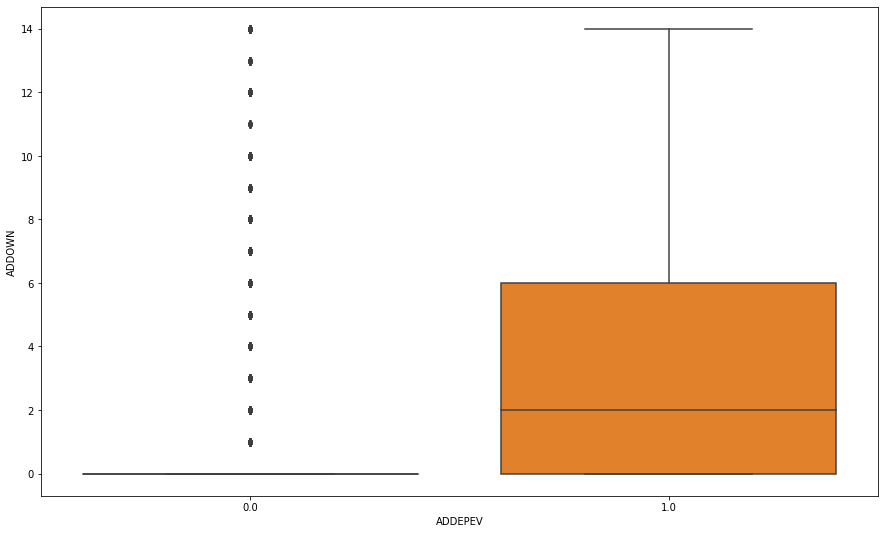

In [32]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADDOWN')
#people who reported depression had more days FEELING DOWN DEPRESSED OR HOPELESS

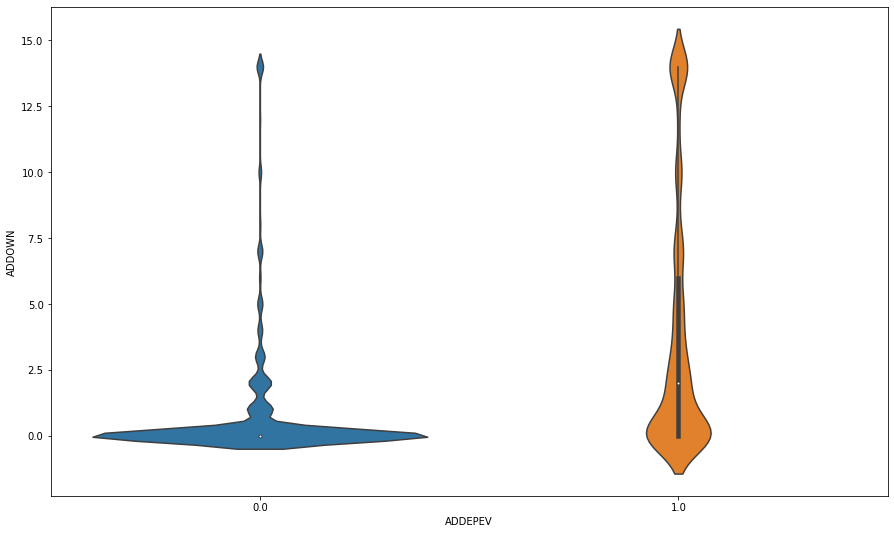

In [33]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADDOWN')
#most of the people who didn't get diagnosed with depression reported 0 days of feeling down, depressed or hopeless

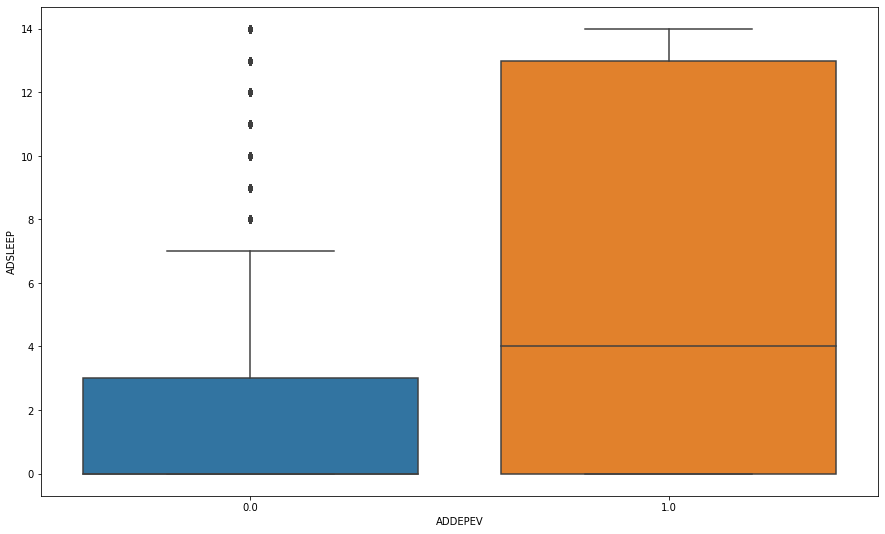

In [34]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADSLEEP')
#people who reported depression had greater variability in sleeping patterns

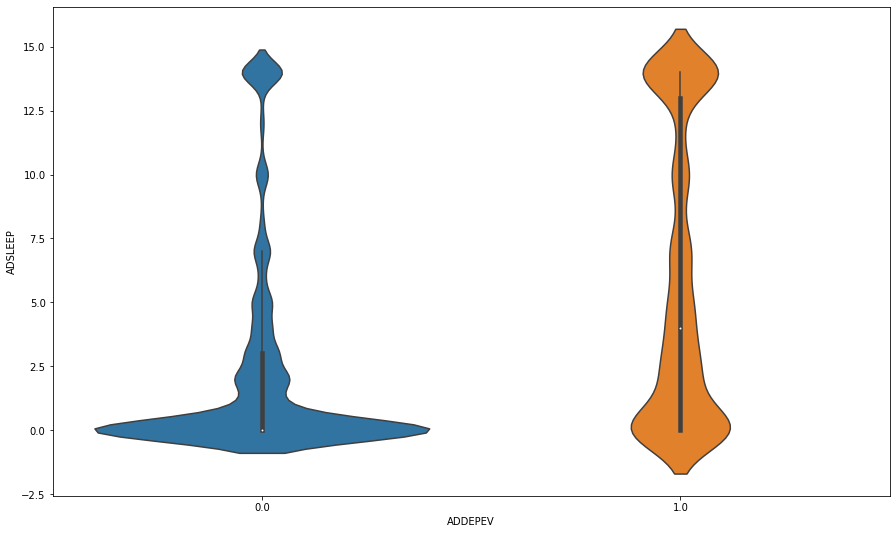

In [35]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADSLEEP')
#answers were more dispersed for those with depression; most people without depression had good sleep

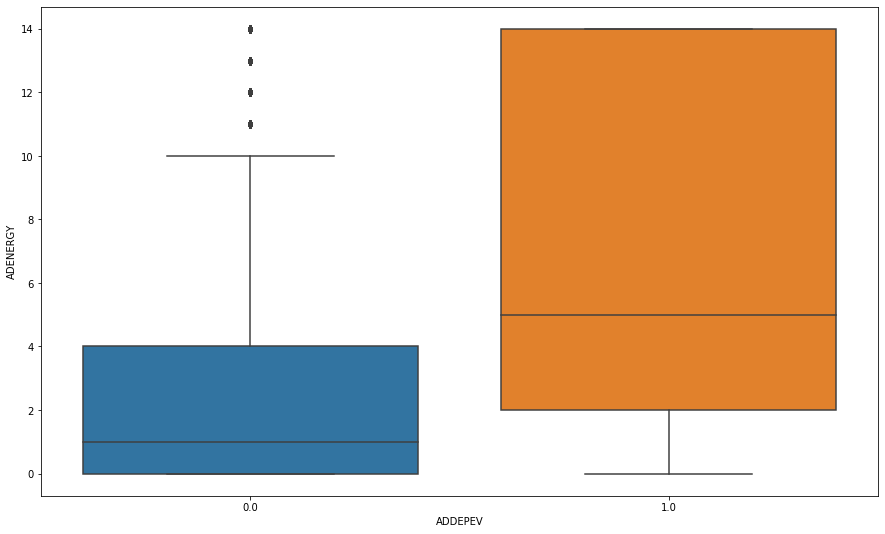

In [36]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADENERGY')
#people who reported depression had more days that they felt tired; people without depression were less tired

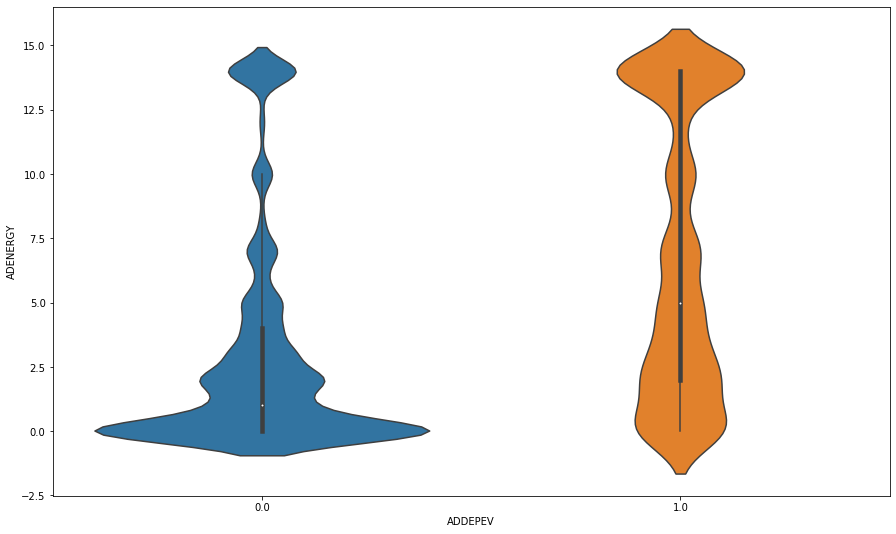

In [37]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADENERGY')
#most people without depression weren't tired, but a large proportion of those depressed had trouble with energy

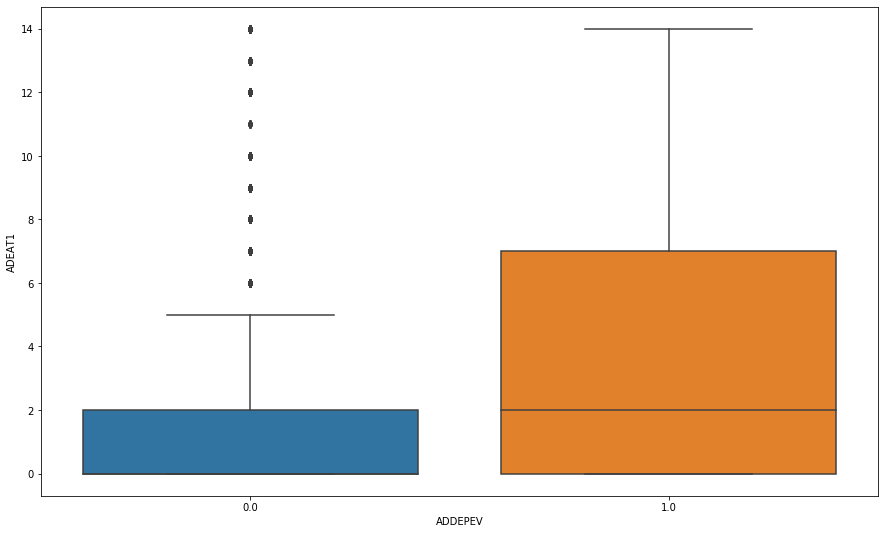

In [38]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADEAT1')
#people who reported depression had more days that they ate too much or too little

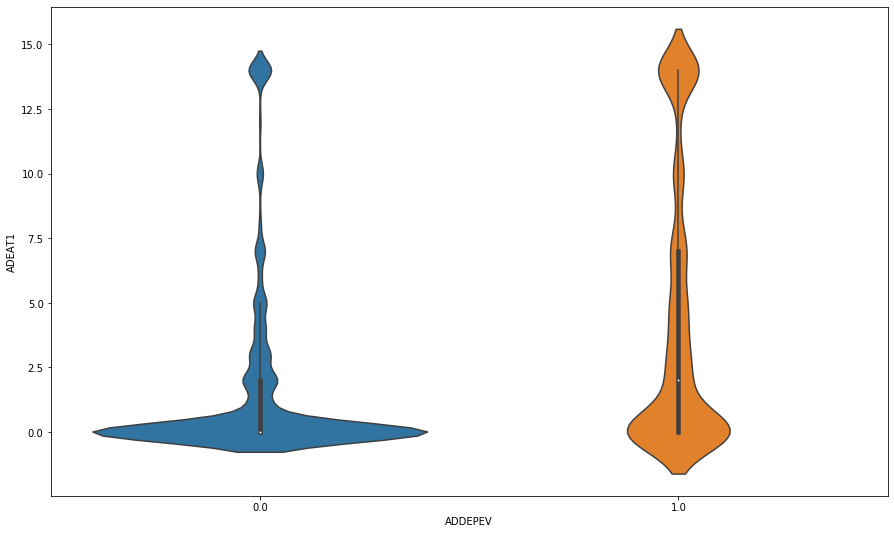

In [39]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADEAT1')
#most people without depression didn't have trouble eating

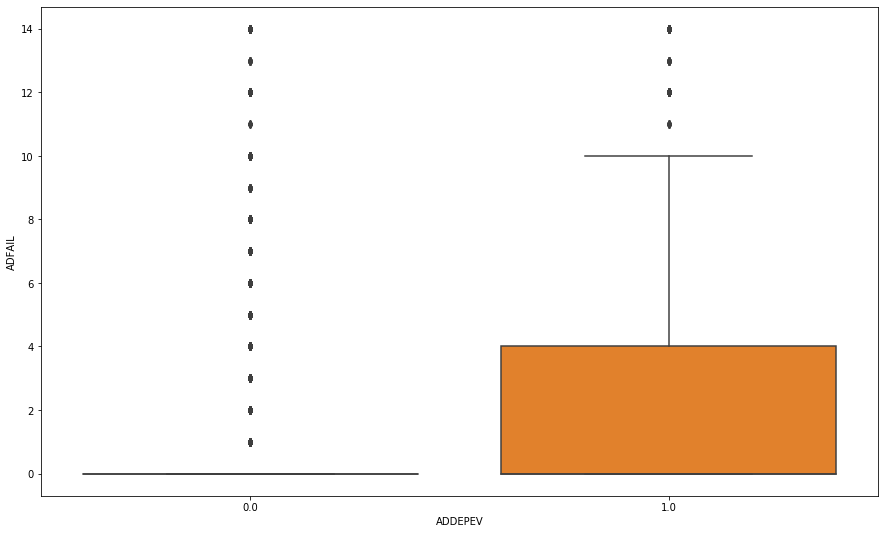

In [40]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADFAIL')
#people who reported depression had more days that they felt like a failure

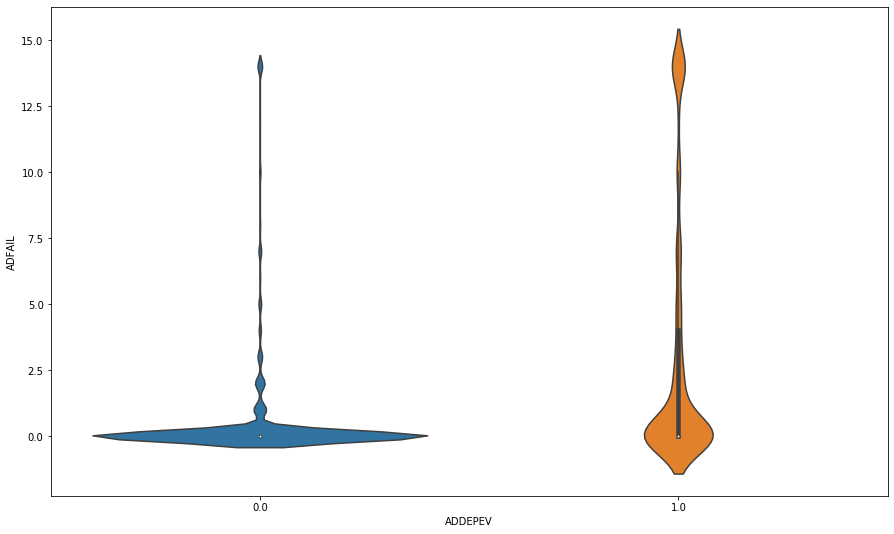

In [41]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADFAIL')
#most people without depression didn't feel like a failure

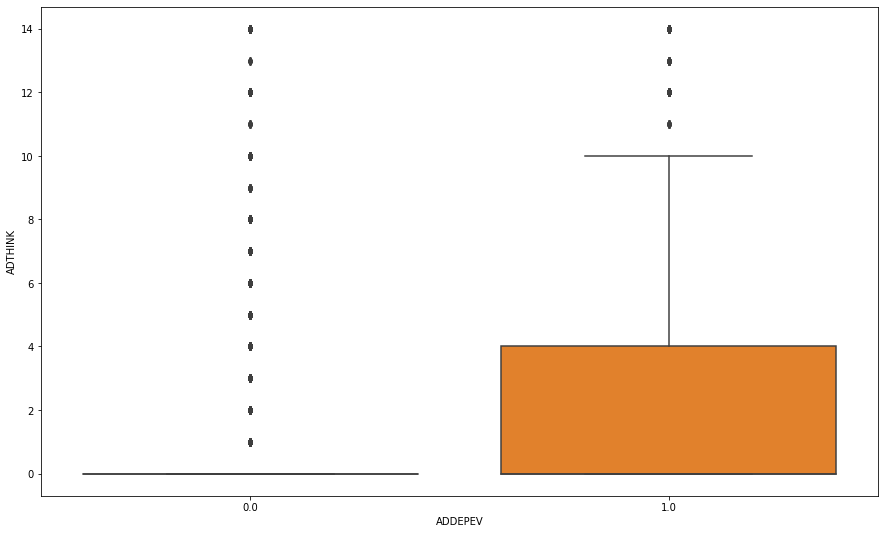

In [42]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADTHINK')
#people who reported depression had more days that they had trouble concentrating

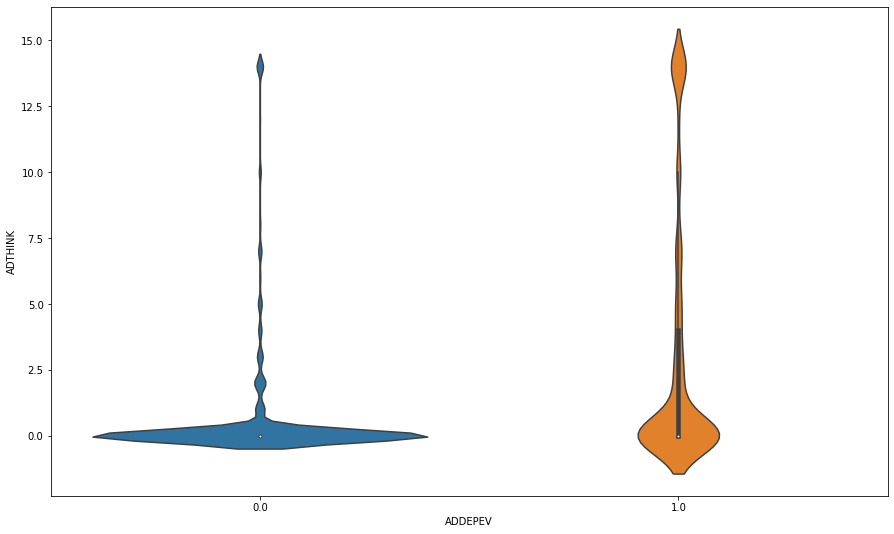

In [43]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADTHINK')
#most people without depression didn't have trouble concentrating

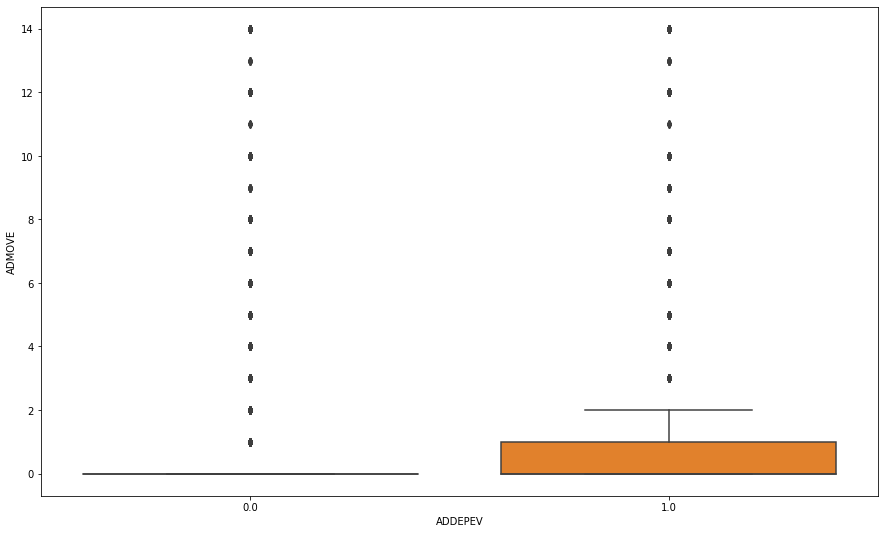

In [44]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADMOVE')
#people who reported depression had more days that they moved too slowly or too quickly

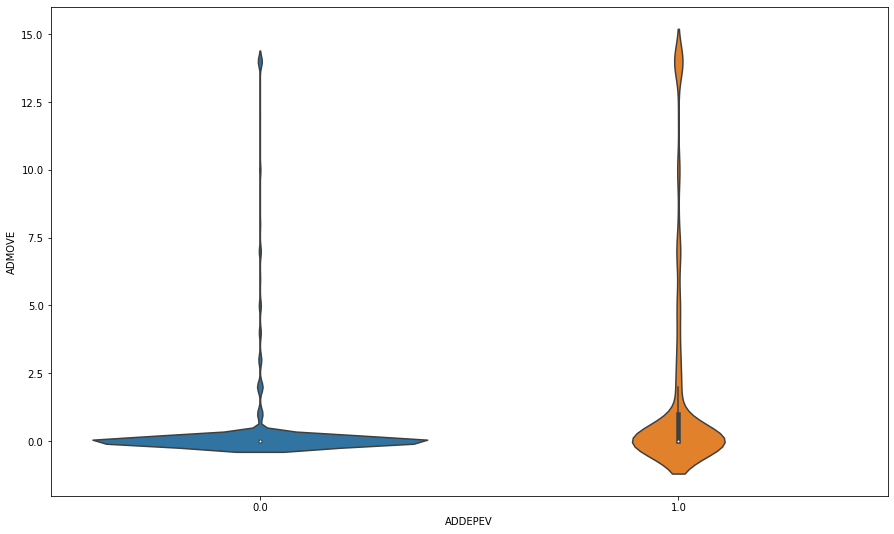

In [45]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADMOVE')
#most people without depression didn't have trouble with moving too slowly or too quickly; depression had more variability

In [46]:
mental_health.columns

Index(['EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY',
       'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [47]:
#create categorical dataframe

mhcat=mental_health[['EMTSUPRT', 'LSATISFY', 'ADANXEV', 'ADDEPEV']]
mhcat.dtypes
mhcat.EMTSUPRT.unique()
mhcat.reset_index(inplace=True)

In [48]:
mental_health.dtypes

EMTSUPRT    float64
LSATISFY    float64
ADPLEASR    float64
ADDOWN      float64
ADSLEEP     float64
ADENERGY    float64
ADEAT1      float64
ADFAIL      float64
ADTHINK     float64
ADMOVE      float64
ADANXEV     float64
ADDEPEV     float64
dtype: object

In [49]:
#standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
mh_num=mental_health[['ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY','ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE']]
scaled_mh = scaler.fit_transform(mh_num)
scaled_mh= pd.DataFrame(scaled_mh)
scaled_mh.shape

(72432, 8)

In [50]:
mhcat.shape


(72432, 5)

In [51]:
mental_health=pd.concat([scaled_mh, mhcat], axis=1)
mental_health.head(50)
mental_health.EMTSUPRT.unique()

array([2., 1., 5., 3., 4., 7., 9.])

In [52]:
mental_health2=pd.get_dummies(mental_health, columns=['EMTSUPRT', 'LSATISFY', 'ADANXEV'])
mental_health2.head(100)

,0,1,2,3,4,5,6,7,index,ADDEPEV,...,LSATISFY_1.0,LSATISFY_2.0,LSATISFY_3.0,LSATISFY_4.0,LSATISFY_7.0,LSATISFY_9.0,ADANXEV_1.0,ADANXEV_2.0,ADANXEV_7.0,ADANXEV_9.0
0,-0.474949,-0.415352,-0.417389,-0.562050,-0.023264,-0.321384,-0.339230,-0.260319,9632,0.0,...,0,1,0,0,0,0,0,1,0,0
1,-0.188291,-0.090648,-0.417389,-0.136015,-0.525596,-0.321384,-0.339230,-0.260319,9633,0.0,...,0,1,0,0,0,0,0,1,0,0
2,-0.474949,-0.415352,-0.417389,-0.775068,0.227902,-0.321384,-0.339230,-0.260319,9634,0.0,...,0,0,0,1,0,0,0,1,0,0
3,1.818312,-0.415352,-0.636725,0.503037,-0.525596,-0.321384,-0.339230,-0.260319,9635,1.0,...,0,1,0,0,0,0,0,1,0,0
4,-0.474949,-0.415352,-0.636725,-0.349033,-0.525596,-0.321384,-0.339230,-0.260319,9636,0.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.474949,-0.415352,-0.417389,-0.349033,-0.525596,-0.321384,-0.339230,-0.260319,9743,0.0,...,0,1,0,0,0,0,0,1,0,0
96,-0.188291,-0.415352,2.433974,2.207177,-0.023264,0.035008,1.348742,0.576473,9744,0.0,...,0,1,0,0,0,0,1,0,0,0
97,0.385024,-0.415352,-0.417389,-0.136015,-0.274430,0.747792,-0.339230,-0.260319,9745,0.0,...,0,1,0,0,0,0,0,1,0,0
98,-0.474949,-0.415352,-0.636725,-0.775068,-0.525596,-0.321384,-0.339230,-0.260319,9746,0.0,...,0,1,0,0,0,0,0,1,0,0


In [53]:
mental_health.ADDEPEV.value_counts()
#1 yes, 2 no
#Has a doctor or other healthcare provider EVER told you that you have a depressive disorder (including depression,
#major depression, dysthymia, or minor depression)?

0.0    59630
1.0    12802
Name: ADDEPEV, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#split into X and y variables
X=mental_health.drop(columns='ADDEPEV')

In [56]:
y=mental_health['ADDEPEV']
y


0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
72427    0.0
72428    0.0
72429    1.0
72430    1.0
72431    0.0
Name: ADDEPEV, Length: 72432, dtype: float64

In [57]:
#split training and test data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=111)

In [58]:
from collections import Counter
Counter(y_train)

Counter({0.0: 47666, 1.0: 10279})

### Modeling
This is a supervised learning classification problem. Therefore I have tested the following classification models:

- Logistic Regression
- K-Nearest Neighbor (KNN)
- Decision Tree
- Random Forest
- Gradiant Boost

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500).fit(X_train, y_train)
preds = model1.predict(X_test)
LogisticRegression(penalty='l2', class_weight='balanced', C=1)

LogisticRegression(C=1, class_weight='balanced')

In [60]:
params = model1.get_params()
print(params)
model1.classes_

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


array([0., 1.])

In [61]:
model1.score(X_test, y_test)

0.8258438600124249

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model1.predict(X_test))

array([[11964,     0],
       [ 2523,     0]], dtype=int64)

In [76]:
model2=LogisticRegression(random_state=0, penalty= 'none', solver='lbfgs', max_iter=500).fit(X_train, y_train)
preds2=(model2.predict_proba(X_test)[:,1] >=.15).astype(bool)



In [77]:
params2=model2.get_params()
print(params2)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [78]:
model2.score(X_test, y_test)

0.8258438600124249

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds2)

array([[4278, 7686],
       [1015, 1508]], dtype=int64)

The confusion matrix shows that although the score for the model is good, the model is not a good fit because it predicts the same outcome for all values of X. It classifies everything as 2 (No), which is not good. Therefore, we will try another model. Perhaps KNN is the better model for this problem.

### KNN

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [157]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8226076451807749
Best Parameters: {'n_neighbors': 30}


In [158]:
import sklearn.metrics as metrics
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8258438600124249
[[11964     0]
 [ 2523     0]]


This model also does not do a good job because it makes the same predictions as the logistic regression. 

## SVM

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.precision_score(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

## Decision Tree
Next, I will try a decision tree and I will tune the hyperparameters to achieve optimal results. First, I will try a decision tree with all the hyperparamters set at the default.

In [161]:
from sklearn import tree

In [162]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)


In [163]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7949886104783599


In [164]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.41613508442776737


In [165]:
print(confusion_matrix(y_test, y_pred))

[[10408  1556]
 [ 1414  1109]]


This initial model does not do a very good job of classifying people with depression because it has a high false positive rate. Next, I will try to tune the criterion and max depth.

In [148]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf2 = clf2.fit(X_train, y_train)
y_pred2=clf2.predict(X_test)


In [152]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8676054393594257


In [153]:
print("Precision:",metrics.precision_score(y_test, y_pred2))

Precision: 0.6841144248326233


In [154]:
print(confusion_matrix(y_test, y_pred2))

[[11445   519]
 [ 1399  1124]]


This model does a good job of predicting depression. I specified the entropy model and a max depth of 5. It correctly identifies 1124 people with depression. There are 519 false positives out of 11964 true negatives. This is an acceptable error rate because it correctly detects almost half of the people with depression who may otherwise have not been identified prior to this screening.